<a href="https://colab.research.google.com/github/Ashishat404/Data-Science/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


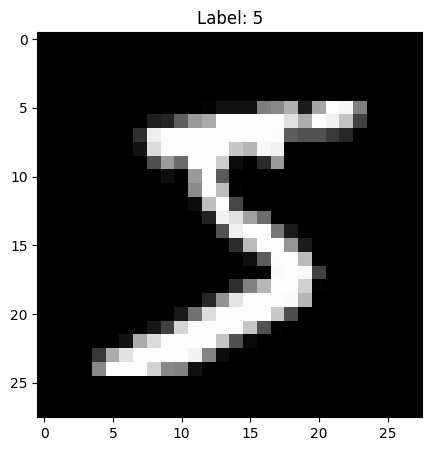

Training Data Shape: (60000, 28, 28)
We have 60,000 images, and each one is a 28x28 grid of pixels.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset (Handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize the images (Make pixels between 0 and 1 instead of 0 and 255)
# This helps the AI learn much faster!
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Visualize the first image
plt.figure(figsize=(5,5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

print(f"Training Data Shape: {x_train.shape}")
print("We have 60,000 images, and each one is a 28x28 grid of pixels.")

In [2]:
# 1. Build the Neural Network structure
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # Unroll the 28x28 grid into a flat line
  tf.keras.layers.Dense(128, activation='relu'),   # The "Brain" (128 neurons looking for patterns)
  tf.keras.layers.Dropout(0.2),                    # Randomly forgets 20% to prevent "memorizing" answers
  tf.keras.layers.Dense(10, activation='softmax')  # Output layer: Gives % chance for digits 0-9
])

# 2. Compile the model (Choose the math/optimizer)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train the model (The "Fit" step)
print("Training the AI... Watch the accuracy go up!")
model.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the AI... Watch the accuracy go up!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8570 - loss: 0.4893
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9550 - loss: 0.1534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9693 - loss: 0.1066
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9726 - loss: 0.0896
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0729


In [3]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9730 - loss: 0.0849

Test Accuracy: 0.9730


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


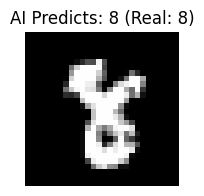

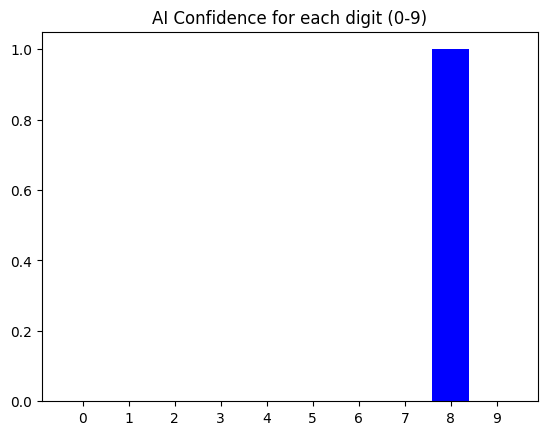

In [4]:
# 1. Pick a random image from the test set
import random
i = random.randint(0, 1000)

# 2. Ask the model to predict
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[i])
true_label = y_test[i]

# 3. Show the image and the prediction
plt.figure(figsize=(2,2))
plt.imshow(x_test[i], cmap='gray')
plt.title(f"AI Predicts: {predicted_label} (Real: {true_label})")
plt.axis('off')
plt.show()

# 4. Show the confidence bar chart
plt.bar(range(10), predictions[i], color='blue')
plt.xticks(range(10))
plt.title("AI Confidence for each digit (0-9)")
plt.show()

In [5]:
# for CNN BRAIN
# upgrading to a CNN (Convolutional Neural Network),
# you are moving from "basic math" to "simulated vision."


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Reshape data to (28, 28, 1) because CNNs expect a "color channel"
# (Even though it's black & white, we need to be explicit that there's 1 channel)
x_train_cnn = x_train.reshape((60000, 28, 28, 1))
x_test_cnn = x_test.reshape((10000, 28, 28, 1))

# 2. Build the "DeepLense" Style CNN
model_cnn = models.Sequential([
    # Layer 1: Scan the image with 32 different "filters" to find edges
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), # Summarize the findings (make image smaller)

    # Layer 2: Scan again with 64 filters to find complex shapes (loops, curves)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Layer 3: Flatten and decide (The "Brain" part)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output 0-9
])

# 3. Compile and Train
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training the CNN... This might take slightly longer, but watch the accuracy!")
model_cnn.fit(x_train_cnn, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the CNN... This might take slightly longer, but watch the accuracy!
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.9044 - loss: 0.3156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9860 - loss: 0.0467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9900 - loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9937 - loss: 0.0200
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9952 - loss: 0.0153


In [7]:
# Evaluate the CNN on the test data
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

Final Test Accuracy: 98.62%


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


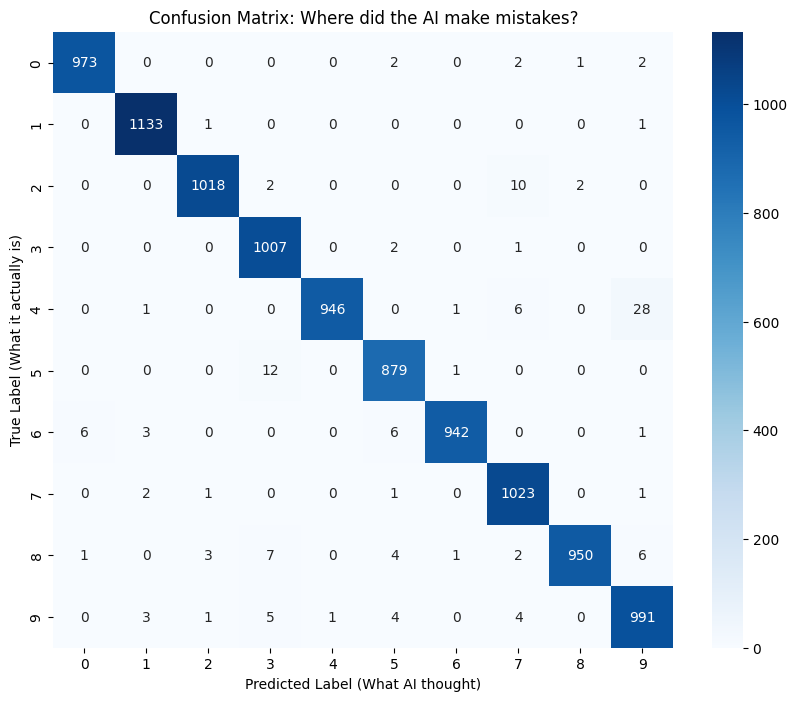

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get predictions for all 10,000 test images
y_pred_probs = model_cnn.predict(x_test_cnn)
y_pred = y_pred_probs.argmax(axis=1)

# 2. Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot it nicely
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label (What AI thought)')
plt.ylabel('True Label (What it actually is)')
plt.title('Confusion Matrix: Where did the AI make mistakes?')
plt.show()